<a href="https://colab.research.google.com/github/SorenKyhl/pytorch-deep-learning/blob/main/extras/exercises/03_pytorch_computer_vision_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA).
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [6]:
# Import torch
import torch
from torch import nn
import torchvision
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

%config InlineBackend.figure_format='retina'


# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(device)

2.3.0+cu121
cpu


In [7]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("utils.py").is_file():
  print("utils.py already exists, skipping download")
else:
  print("Downloading utils.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://github.com/SorenKyhl/PyTorch-Examples/blob/main/utils.py")
  with open("utils.py", "wb") as f:
    f.write(request.content)

In [8]:
!pip install torchmetrics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 8.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [9]:
import torchmetrics

In [10]:
# Check for GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [11]:
train_data = torchvision.datasets.MNIST(
    root = "data",
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

test_data = torchvision.datasets.MNIST(
    root = "data",
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)


# Useful for later
class_names = train_data.classes

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 15978784.70it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 513537.08it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 4423690.40it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 3113340.21it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

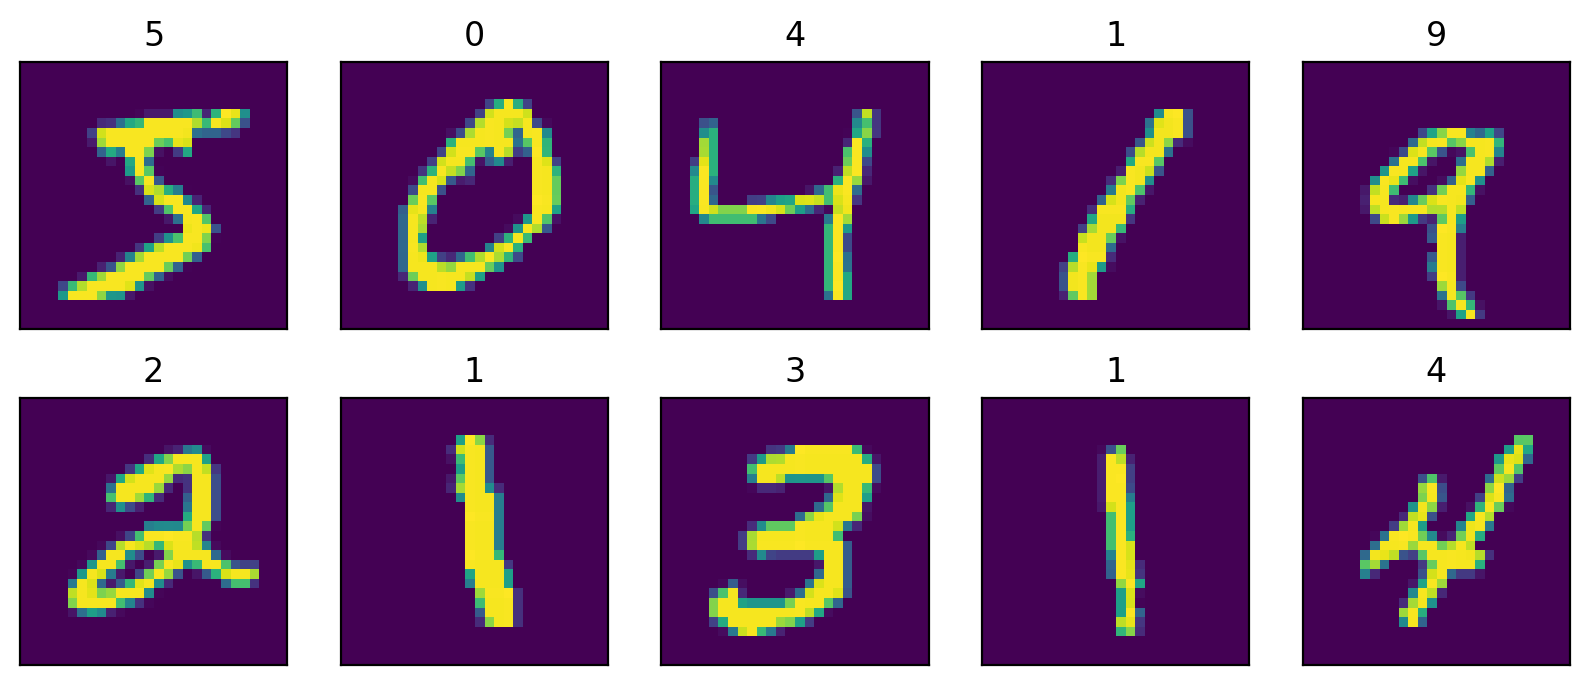

In [12]:
plt.figure(figsize=(10,4))
rows = 2
cols = 5

for i in range(rows*cols):
  plt.subplot(rows, cols,i+1)
  img, label = train_data[i]
  plt.imshow(img.squeeze())
  plt.title(label)

  plt.tick_params(
    axis='both',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelleft=False,
    labelbottom=False)


## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [13]:
batch_size = 32
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [14]:
class TinyNN(nn.Module):
  def __init__(self,
               input_shape = 28*28,
               depth = 10,
               output_shape = 10):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Flatten(),
        nn.Linear(input_shape, depth),
        nn.ReLU(),
        nn.Linear(depth, depth),
        nn.ReLU(),
        nn.Linear(depth, output_shape)
    )

  def forward(self, x):
    return self.linear(x)

class LinearOnlyModel(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like their inputs in vector form
            nn.Linear(in_features=input_shape, out_features=hidden_units), # in_features = number of features in a data sample (784 pixels)
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)


class TinyVGG(nn.Module):
  def __init__(self,
               input_shape = 28*28,
               depth = 8,
               output_shape = 10):
    super().__init__()
    self.linear = nn.Sequential(
        nn.Conv2d(1, depth, 3), # 26 x 26
        nn.ReLU(),
        nn.MaxPool2d(2), # 13x13
        nn.Conv2d(depth, depth, 3), # 11 x 11
        nn.ReLU(),
        nn.MaxPool2d(2), # image size 5 x 5
        nn.Flatten(),
        nn.Linear(5*5*depth, output_shape)
    )

  def forward(self, x):
    return self.linear(x)

class PyTorchClassifier():
  """wrapper for a PyTorch classifier model + loss function + optimizer"""
  def __init__(self,
               model : nn.Module,
               lr : float = 1e-1,
               class_names = class_names,
               ):
    self.model = model
    self.loss_fn = nn.CrossEntropyLoss()
    self.optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)
    self.accuracy_fn = torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)

In [15]:
model_0 = PyTorchClassifier(TinyNN(28*28, 8, len(class_names)), class_names=class_names)
model_1 = PyTorchClassifier(LinearOnlyModel(28*28, 10, len(class_names)), class_names=class_names)
model_2 = PyTorchClassifier(TinyNN(28*28, 20, len(class_names)), class_names=class_names)

In [16]:
model_3 = PyTorchClassifier(TinyNN(28*28, 48, len(class_names)), class_names=class_names)

In [26]:
model_4 = PyTorchClassifier(TinyVGG(28*28, 8, len(class_names)), class_names=class_names)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [18]:
def train_epoch(train_dataloader,
                modelwrapper : PyTorchClassifier,
                dump_frequency : float = 100,
                device = device):
  """trains one epoch"""
  progress = []
  losses = []
  accs = []
  model = modelwrapper.model
  loss_fn = modelwrapper.loss_fn
  optimizer = modelwrapper.optimizer

  model.to(device)
  for batch, (X, y) in enumerate(train_dataloader):
    model.train()
    X, y = X.to(device), y.to(device)
    logits = model(X).squeeze()
    loss = loss_fn(logits, y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if batch % dump_frequency == 0:
      preds = torch.argmax(logits, dim=1)
      acc = modelwrapper.accuracy_fn(preds, y)
      progress.append(batch/len(train_dataloader))
      losses.append(loss.item())
      accs.append(acc.item())
      print(f"training loss: {loss:.3f} \t acc: {acc:.3f} \t batch: [{batch} / {len(train_dataloader)} ]")

  return progress, losses, accs

In [19]:
def test(test_dataloader,
         modelwrapper: PyTorchClassifier,
         device = device):
  model = modelwrapper.model
  loss_fn = modelwrapper.loss_fn

  n_batches = len(test_dataloader)

  model.to(device)
  model.eval()
  with torch.inference_mode():
    total_loss = 0
    total_acc = 0

    for batch, (X, y) in enumerate(test_dataloader):
      X, y = X.to(device), y.to(device)
      logits = model(X).squeeze()
      total_loss += loss_fn(logits, y)
      total_acc += modelwrapper.accuracy_fn(torch.argmax(logits, dim=1), y)

    total_loss /= n_batches
    total_acc /= n_batches


    print(f"Model Name: {model.__class__.__name__}")
    print(f"test loss: {total_loss:.3f} \t test acc: {total_acc:.3f}")


  return total_loss, total_acc

In [20]:
def train(modelwrapper: PyTorchClassifier,
          n_epochs,
          train_dataloader = train_dataloader,
          test_dataloader = test_dataloader,
          device = device
          ):
  """full training loop"""

  epochs = []
  losses = []
  accs = []

  for epoch in tqdm(range(n_epochs)):
    progress, loss, acc = train_epoch(train_dataloader, modelwrapper, device = device)

    epochs = np.hstack((epochs, np.array(progress)+epoch))
    losses = np.hstack((losses, loss))
    accs = np.hstack((accs, acc))

    if epoch % 1 == 0:
      print(f"----- Epoch: {epoch} -----")
      loss, acc = test(test_dataloader, modelwrapper, device = device)

  return epochs, losses, accs


In [217]:
epochs0, losses0, accs0 = train(model_0, 2)

  0%|          | 0/2 [00:00<?, ?it/s]

training loss: 2.378 	 acc: 0.062 	 batch: [0 / 1875 ]
training loss: 1.357 	 acc: 0.688 	 batch: [100 / 1875 ]
training loss: 1.015 	 acc: 0.656 	 batch: [200 / 1875 ]
training loss: 0.658 	 acc: 0.719 	 batch: [300 / 1875 ]
training loss: 0.352 	 acc: 0.906 	 batch: [400 / 1875 ]
training loss: 0.566 	 acc: 0.875 	 batch: [500 / 1875 ]
training loss: 0.320 	 acc: 0.906 	 batch: [600 / 1875 ]
training loss: 0.242 	 acc: 0.938 	 batch: [700 / 1875 ]
training loss: 0.408 	 acc: 0.844 	 batch: [800 / 1875 ]
training loss: 0.255 	 acc: 0.938 	 batch: [900 / 1875 ]
training loss: 0.324 	 acc: 0.875 	 batch: [1000 / 1875 ]
training loss: 0.185 	 acc: 0.938 	 batch: [1100 / 1875 ]
training loss: 0.272 	 acc: 0.875 	 batch: [1200 / 1875 ]
training loss: 0.525 	 acc: 0.875 	 batch: [1300 / 1875 ]
training loss: 0.324 	 acc: 0.906 	 batch: [1400 / 1875 ]
training loss: 0.324 	 acc: 0.938 	 batch: [1500 / 1875 ]
training loss: 0.289 	 acc: 0.875 	 batch: [1600 / 1875 ]
training loss: 0.276 	 acc

In [211]:
epochs, losses, accs = train(model_1, 2)

  0%|          | 0/2 [00:00<?, ?it/s]

training loss: 2.329 	 acc: 0.062 	 batch: [0 / 1875 ]
training loss: 0.827 	 acc: 0.812 	 batch: [100 / 1875 ]
training loss: 0.443 	 acc: 0.844 	 batch: [200 / 1875 ]
training loss: 0.270 	 acc: 0.969 	 batch: [300 / 1875 ]
training loss: 0.333 	 acc: 0.906 	 batch: [400 / 1875 ]
training loss: 0.471 	 acc: 0.875 	 batch: [500 / 1875 ]
training loss: 0.284 	 acc: 0.844 	 batch: [600 / 1875 ]
training loss: 0.224 	 acc: 0.938 	 batch: [700 / 1875 ]
training loss: 0.261 	 acc: 0.875 	 batch: [800 / 1875 ]
training loss: 0.198 	 acc: 0.969 	 batch: [900 / 1875 ]
training loss: 0.439 	 acc: 0.844 	 batch: [1000 / 1875 ]
training loss: 0.297 	 acc: 0.875 	 batch: [1100 / 1875 ]
training loss: 0.339 	 acc: 0.875 	 batch: [1200 / 1875 ]
training loss: 0.375 	 acc: 0.875 	 batch: [1300 / 1875 ]
training loss: 0.286 	 acc: 0.875 	 batch: [1400 / 1875 ]
training loss: 0.320 	 acc: 0.906 	 batch: [1500 / 1875 ]
training loss: 0.427 	 acc: 0.875 	 batch: [1600 / 1875 ]
training loss: 0.279 	 acc

In [224]:
epochs2, losses2, accs2 = train(model_2, 2)

  0%|          | 0/2 [00:00<?, ?it/s]

training loss: 2.337 	 acc: 0.062 	 batch: [0 / 1875 ]
training loss: 1.271 	 acc: 0.656 	 batch: [100 / 1875 ]
training loss: 0.648 	 acc: 0.844 	 batch: [200 / 1875 ]
training loss: 0.354 	 acc: 0.875 	 batch: [300 / 1875 ]
training loss: 0.294 	 acc: 0.969 	 batch: [400 / 1875 ]
training loss: 0.505 	 acc: 0.875 	 batch: [500 / 1875 ]
training loss: 0.362 	 acc: 0.844 	 batch: [600 / 1875 ]
training loss: 0.190 	 acc: 0.938 	 batch: [700 / 1875 ]
training loss: 0.341 	 acc: 0.875 	 batch: [800 / 1875 ]
training loss: 0.151 	 acc: 0.938 	 batch: [900 / 1875 ]
training loss: 0.525 	 acc: 0.844 	 batch: [1000 / 1875 ]
training loss: 0.230 	 acc: 0.906 	 batch: [1100 / 1875 ]
training loss: 0.246 	 acc: 0.906 	 batch: [1200 / 1875 ]
training loss: 0.330 	 acc: 0.875 	 batch: [1300 / 1875 ]
training loss: 0.281 	 acc: 0.875 	 batch: [1400 / 1875 ]
training loss: 0.373 	 acc: 0.906 	 batch: [1500 / 1875 ]
training loss: 0.304 	 acc: 0.875 	 batch: [1600 / 1875 ]
training loss: 0.215 	 acc

In [229]:
epochs3, losses3, accs3 = train(model_3, 2)

  0%|          | 0/2 [00:00<?, ?it/s]

training loss: 2.301 	 acc: 0.094 	 batch: [0 / 1875 ]
training loss: 0.940 	 acc: 0.719 	 batch: [100 / 1875 ]
training loss: 0.533 	 acc: 0.844 	 batch: [200 / 1875 ]
training loss: 0.450 	 acc: 0.875 	 batch: [300 / 1875 ]
training loss: 0.290 	 acc: 0.969 	 batch: [400 / 1875 ]
training loss: 0.440 	 acc: 0.875 	 batch: [500 / 1875 ]
training loss: 0.318 	 acc: 0.844 	 batch: [600 / 1875 ]
training loss: 0.200 	 acc: 0.938 	 batch: [700 / 1875 ]
training loss: 0.202 	 acc: 0.906 	 batch: [800 / 1875 ]
training loss: 0.130 	 acc: 0.969 	 batch: [900 / 1875 ]
training loss: 0.443 	 acc: 0.812 	 batch: [1000 / 1875 ]
training loss: 0.300 	 acc: 0.875 	 batch: [1100 / 1875 ]
training loss: 0.174 	 acc: 0.938 	 batch: [1200 / 1875 ]
training loss: 0.362 	 acc: 0.875 	 batch: [1300 / 1875 ]
training loss: 0.184 	 acc: 0.938 	 batch: [1400 / 1875 ]
training loss: 0.233 	 acc: 0.906 	 batch: [1500 / 1875 ]
training loss: 0.166 	 acc: 0.906 	 batch: [1600 / 1875 ]
training loss: 0.169 	 acc

In [248]:
epochs4, losses4, accs4 = train(model_4, 2)

  0%|          | 0/2 [00:00<?, ?it/s]

training loss: 2.295 	 acc: 0.188 	 batch: [0 / 1875 ]
training loss: 0.580 	 acc: 0.812 	 batch: [100 / 1875 ]
training loss: 0.335 	 acc: 0.906 	 batch: [200 / 1875 ]
training loss: 0.238 	 acc: 0.906 	 batch: [300 / 1875 ]
training loss: 0.119 	 acc: 0.969 	 batch: [400 / 1875 ]
training loss: 0.196 	 acc: 0.969 	 batch: [500 / 1875 ]
training loss: 0.264 	 acc: 0.938 	 batch: [600 / 1875 ]
training loss: 0.118 	 acc: 0.969 	 batch: [700 / 1875 ]
training loss: 0.062 	 acc: 0.969 	 batch: [800 / 1875 ]
training loss: 0.153 	 acc: 0.938 	 batch: [900 / 1875 ]
training loss: 0.194 	 acc: 0.938 	 batch: [1000 / 1875 ]
training loss: 0.164 	 acc: 0.938 	 batch: [1100 / 1875 ]
training loss: 0.210 	 acc: 0.938 	 batch: [1200 / 1875 ]
training loss: 0.240 	 acc: 0.906 	 batch: [1300 / 1875 ]
training loss: 0.059 	 acc: 1.000 	 batch: [1400 / 1875 ]
training loss: 0.230 	 acc: 0.906 	 batch: [1500 / 1875 ]
training loss: 0.110 	 acc: 0.969 	 batch: [1600 / 1875 ]
training loss: 0.017 	 acc

In [245]:
print(model_4.model)

TinyVGG(
  (linear): Sequential(
    (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Flatten(start_dim=1, end_dim=-1)
    (7): Linear(in_features=49, out_features=10, bias=True)
  )
)


In [39]:
def plot_loss_curves(epochs, losses, accs):
  plt.figure(figsize=(10,4))
  plt.subplot(1, 2, 1)
  plt.plot(epochs, losses)
  plt.xlabel("Epochs")
  plt.ylabel("Loss")
  plt.subplot(1, 2, 2)
  plt.plot(epochs, accs)
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")


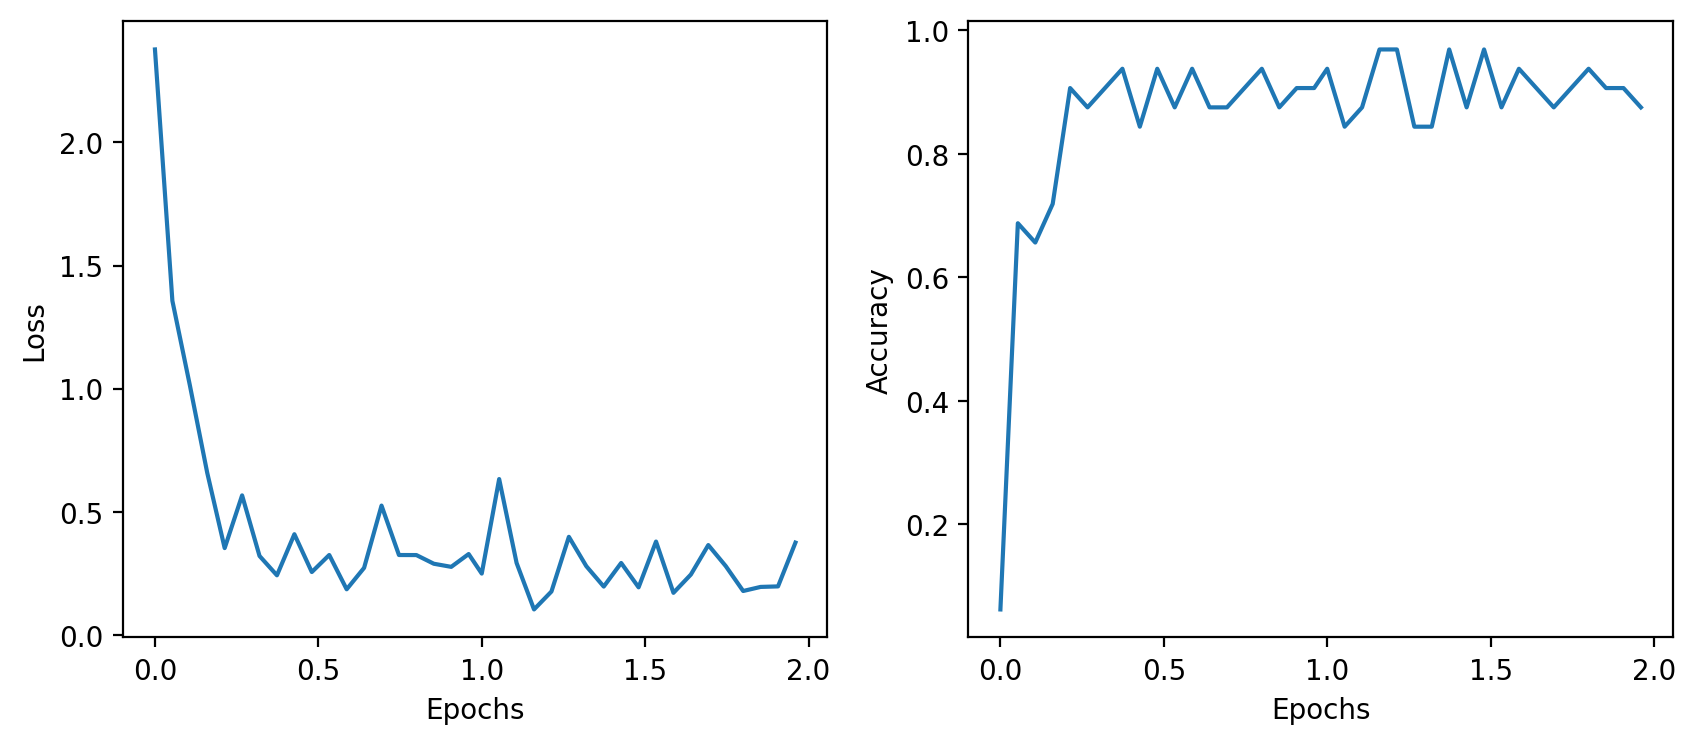

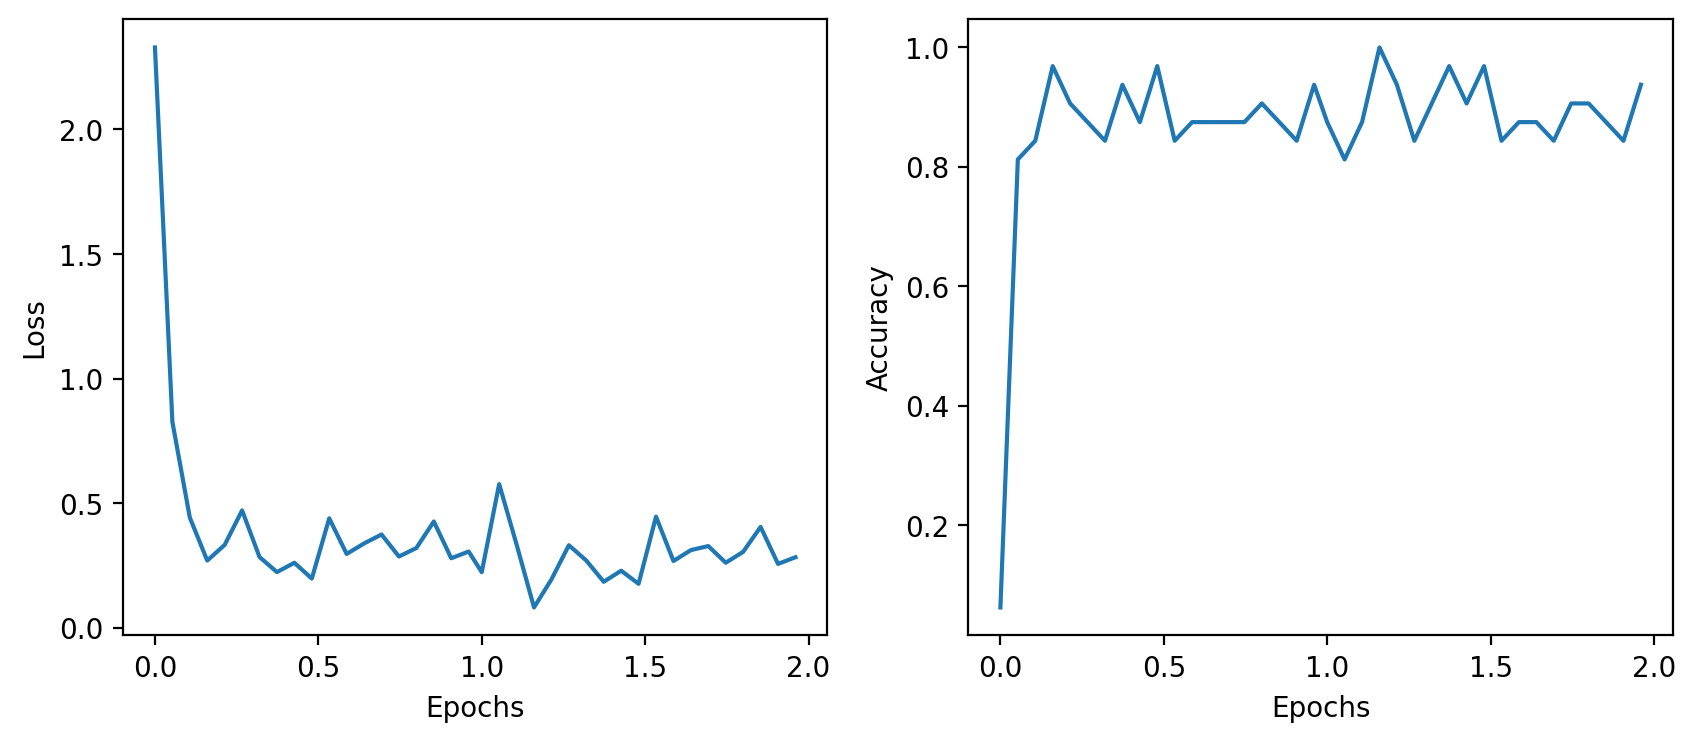

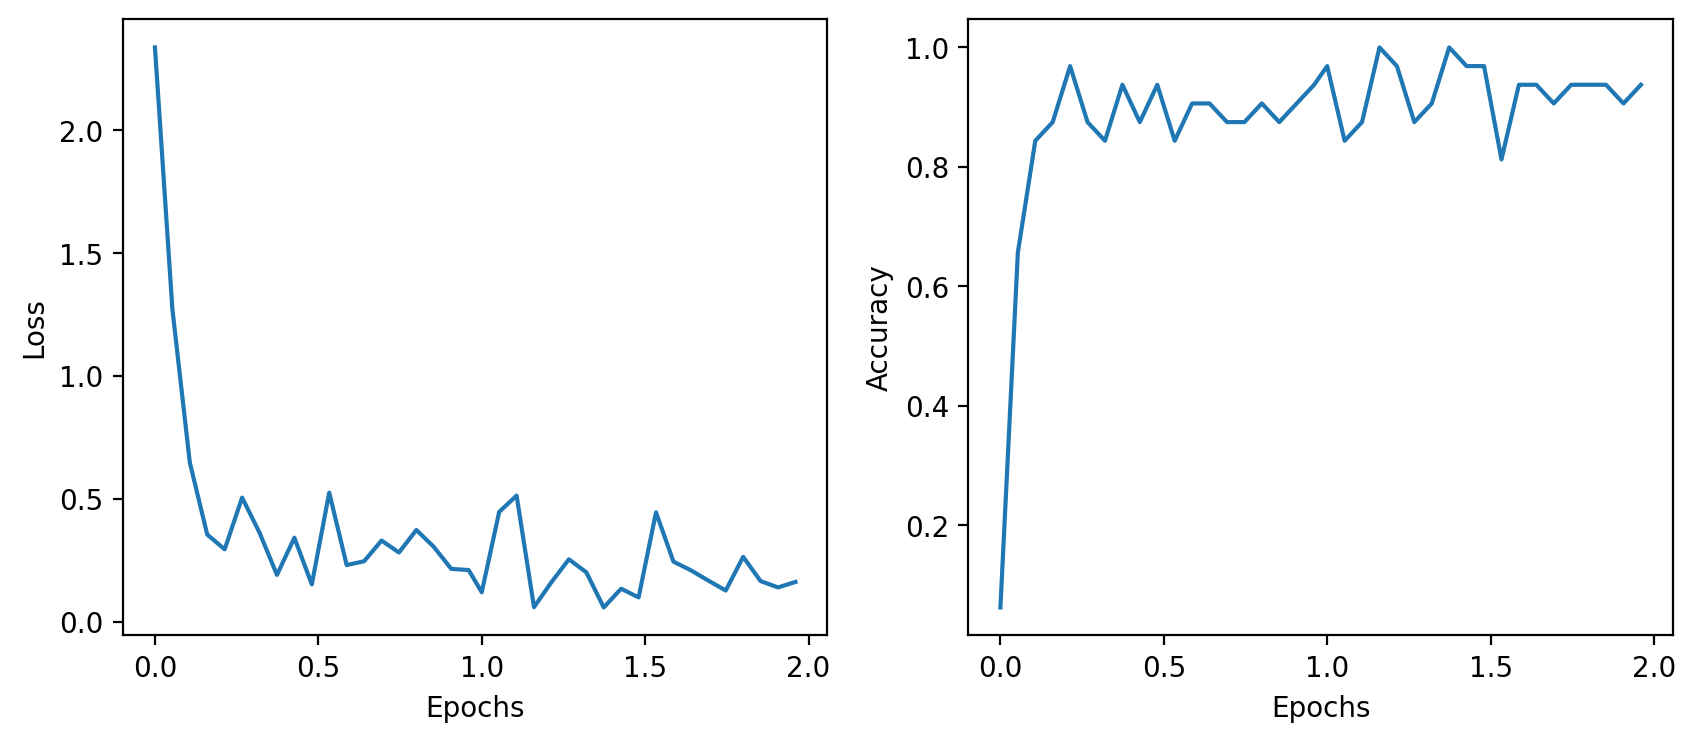

In [225]:
plot_loss_curves(epochs0, losses0, accs0)
plot_loss_curves(epochs, losses, accs)
plot_loss_curves(epochs2, losses2, accs2)


In [222]:
test(test_dataloader, model_0)

Model Name: TinyNN
test loss: 0.250 	 test acc: 0.926


(tensor(0.2501, device='cuda:0'), tensor(0.9258, device='cuda:0'))

In [212]:
test(test_dataloader, model_1)

Model Name: LinearOnlyModel
test loss: 0.314 	 test acc: 0.908


(tensor(0.3140, device='cuda:0'), tensor(0.9080, device='cuda:0'))

In [226]:
test(test_dataloader, model_2)

Model Name: TinyNN
test loss: 0.193 	 test acc: 0.943


(tensor(0.1926, device='cuda:0'), tensor(0.9428, device='cuda:0'))

In [230]:
test(test_dataloader, model_3)

Model Name: TinyNN
test loss: 0.142 	 test acc: 0.956


(tensor(0.1422, device='cuda:0'), tensor(0.9564, device='cuda:0'))

In [249]:
test(test_dataloader, model_4)

Model Name: TinyVGG
test loss: 0.082 	 test acc: 0.973


(tensor(0.0815, device='cuda:0'), tensor(0.9727, device='cuda:0'))

In [155]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

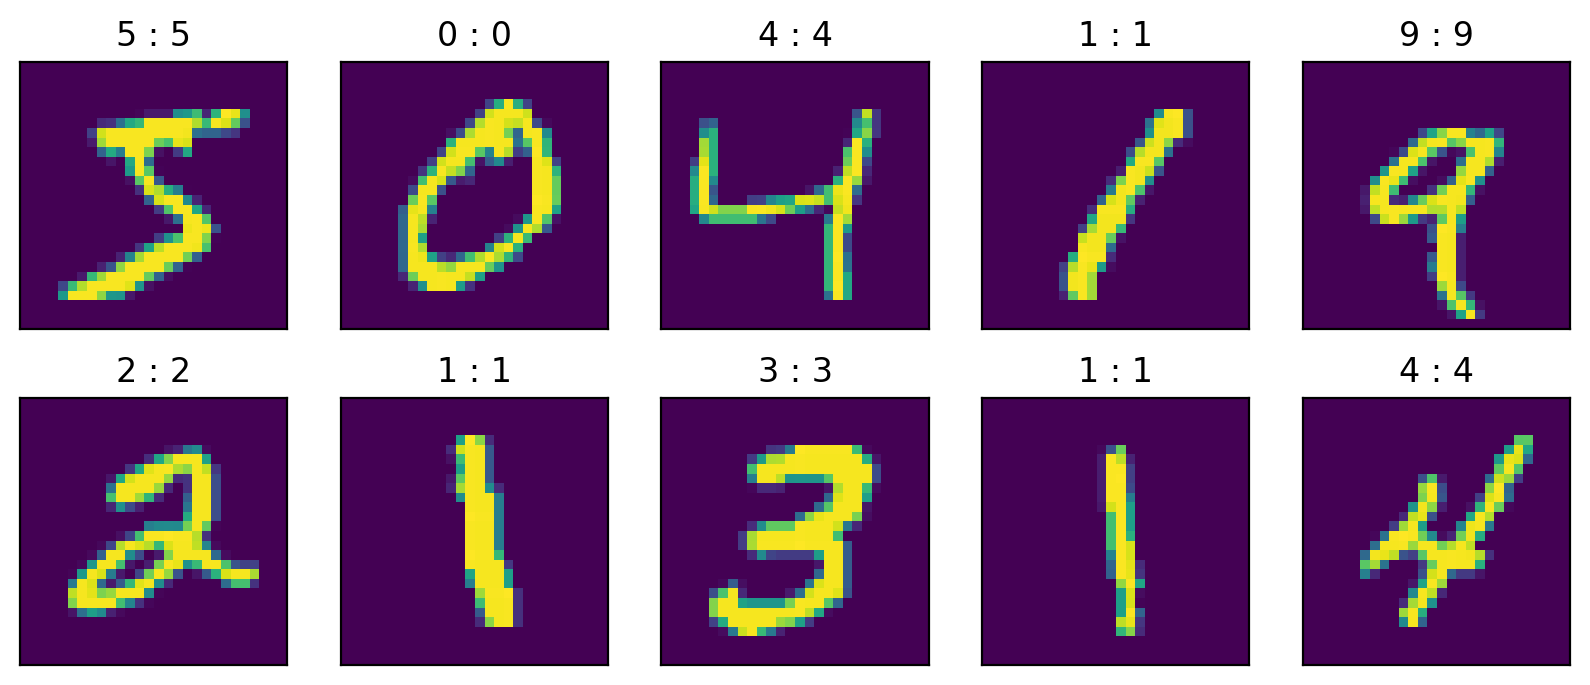

In [169]:
plt.figure(figsize=(10,4))
rows = 2
cols = 5

for i in range(rows*cols):
  plt.subplot(rows, cols,i+1)
  img, label = train_data[i]

  pred = torch.argmax(model_1.model(img.to(device)))
  plt.imshow(img.squeeze())
  plt.title(f"{label} : {pred}")

  plt.tick_params(
    axis='both',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelleft=False,
    labelbottom=False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [35]:
def make_confusion_matrix(model,
                          dataloader=train_dataloader,
                          device=device
                          ):
  """Creates a confusion matrix for a given model"""
  classes = len(class_names)
  confusion_matrix = torch.zeros(classes, classes, dtype=torch.int)

  model.to(device)
  for X, y in test_dataloader:
    X, y = X.to(device), y.to(device)
    preds = torch.argmax(model(X), dim=1)

    for i, j in zip(preds, y):
      confusion_matrix[i, j] += 1

  return confusion_matrix

def plot_confusion_matrix(confusion_matrix):
  """Plots a confusion matrix using Seaborn's heatmap()"""
  sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues')
  plt.xlabel('Predicted Label')
  plt.ylabel('True Label')

In [205]:
conf_0 = make_confusion_matrix(model_0.model)
conf_1 = make_confusion_matrix(model_1.model)


In [231]:
conf_3 = make_confusion_matrix(model_3.model)


In [ ]:
conf_4 = make_confusion_matrix(model_4.model)


<Axes: >

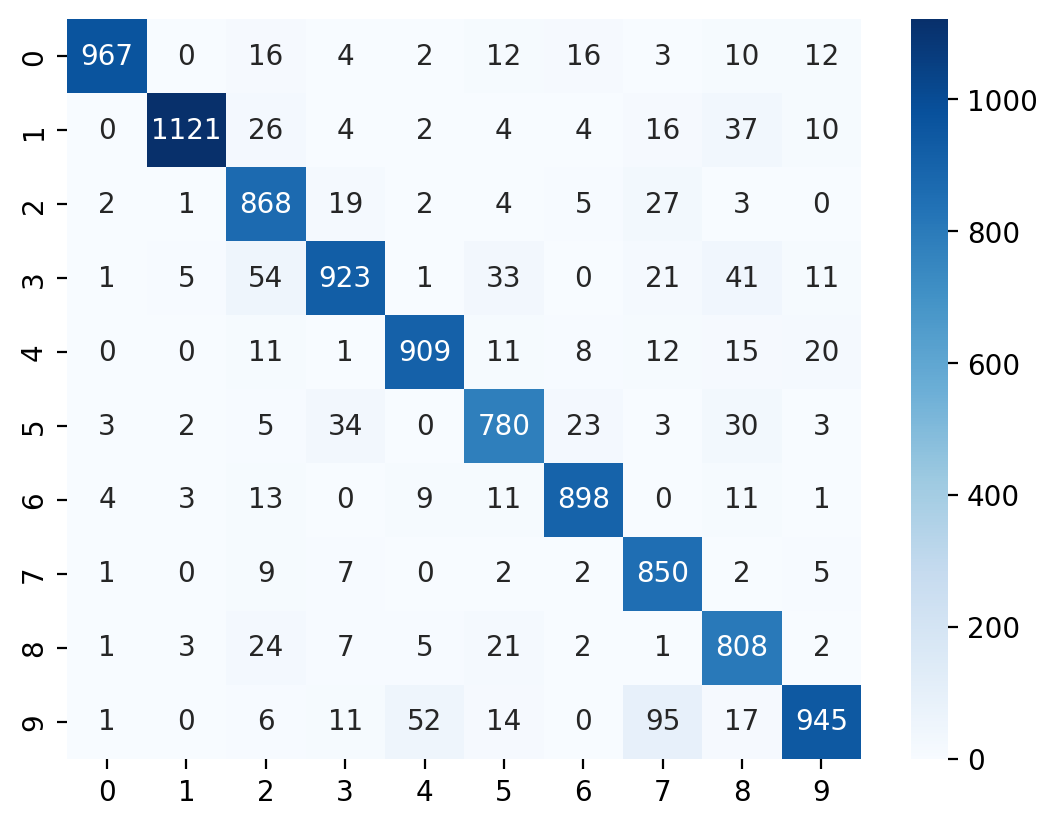

In [206]:
sns.heatmap(conf_0, annot=True, fmt='d', cmap='Blues')

<Axes: >

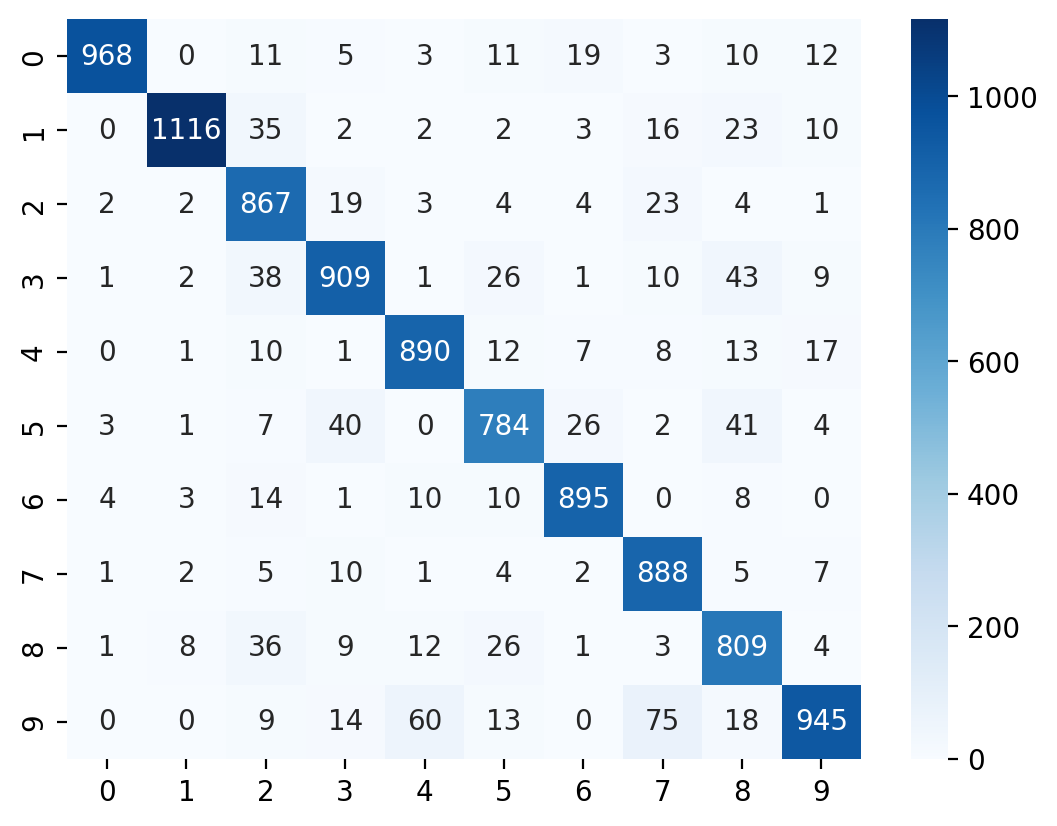

In [196]:
sns.heatmap(conf_1, annot=True, fmt='d', cmap='Blues')

<Axes: >

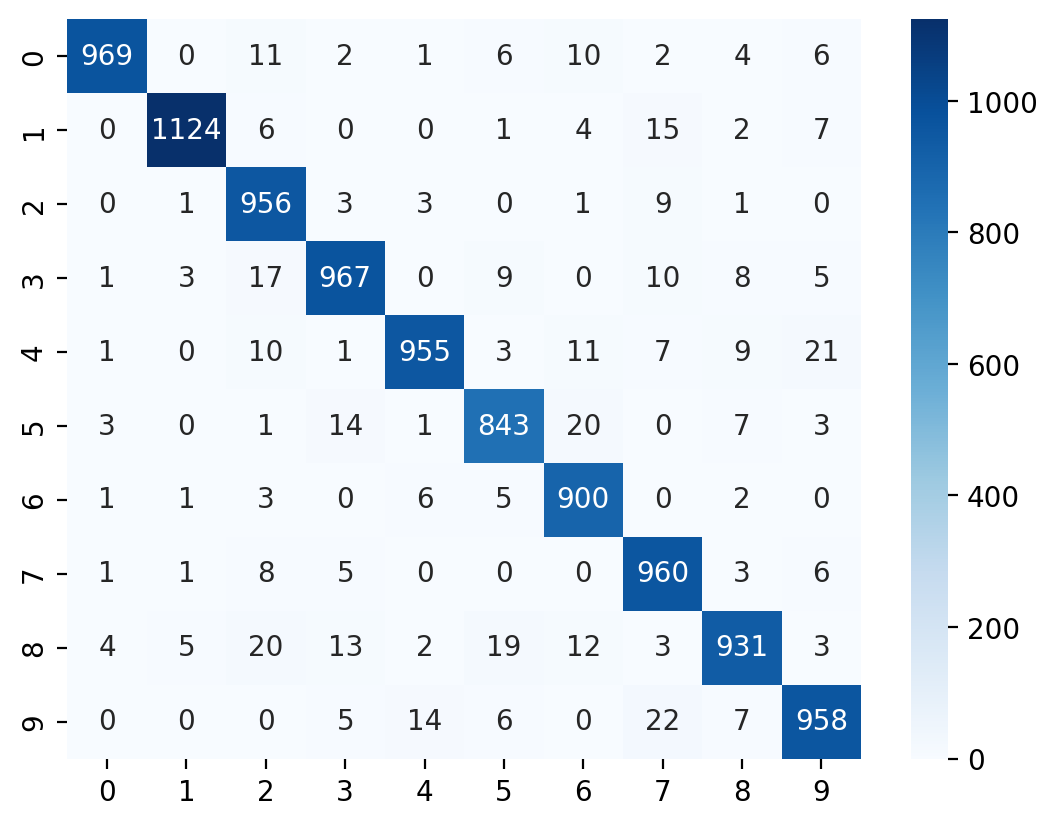

In [232]:
sns.heatmap(conf_3, annot=True, fmt='d', cmap='Blues')

In [250]:
sns.heatmap(conf_4, annot=True, fmt='d', cmap='Blues')

NameError: name 'conf_4' is not defined

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset.
* Then plot some predictions where the model was wrong alongside what the label of the image should've been.
* After visualing these predictions do you think it's more of a modelling error or a data error?
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [1]:
(28-2)/2

13.0

In [2]:
(13-2)/2

5.5

In [4]:
5*5*8

200

In [21]:
train_data = torchvision.datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)

test_data = torchvision.datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = torchvision.transforms.ToTensor(),
    target_transform = None
)


# Useful for later
class_names = train_data.classes

100%|██████████| 26421880/26421880 [00:02<00:00, 11045993.89it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 211897.35it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3874514.13it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11571423.90it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



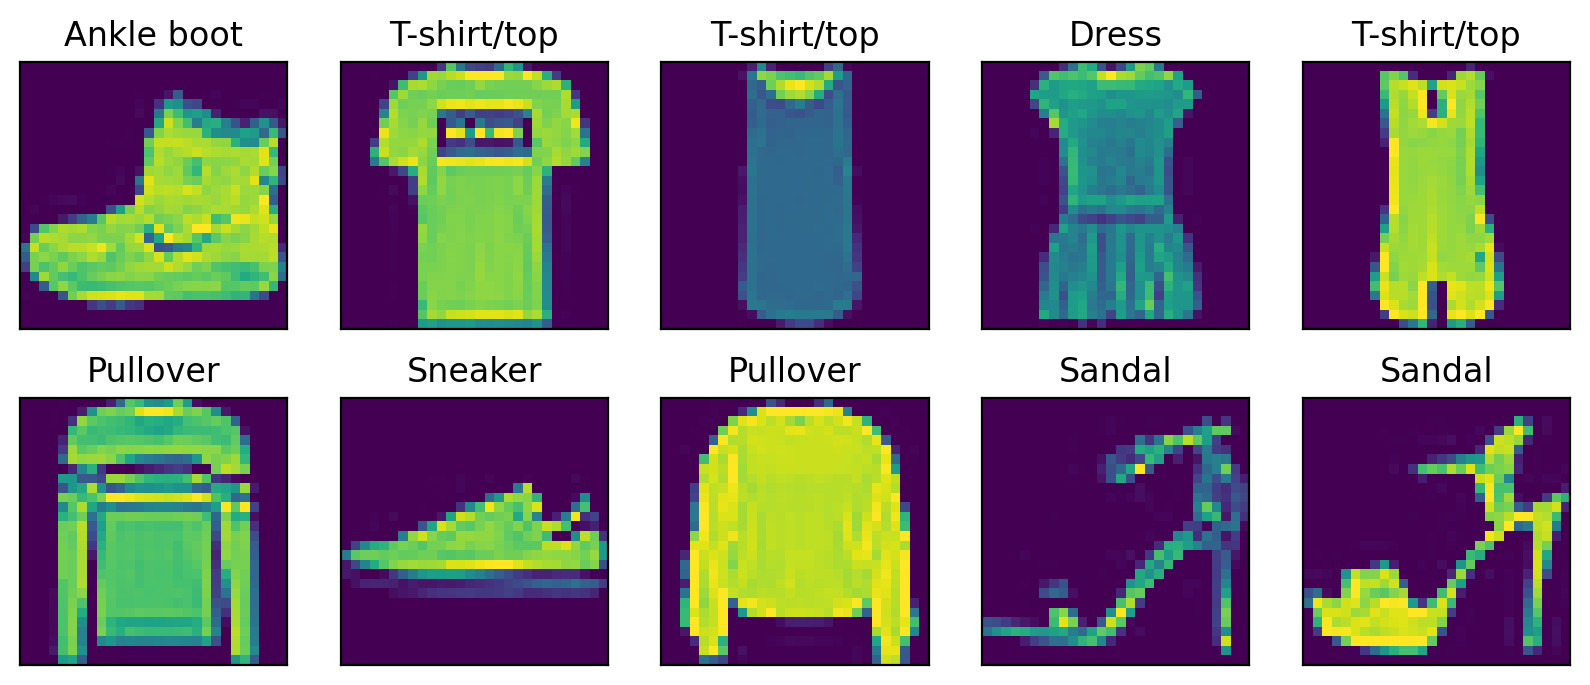

In [24]:
plt.figure(figsize=(10,4))
rows = 2
cols = 5

for i in range(rows*cols):
  plt.subplot(rows, cols,i+1)
  img, label = train_data[i]
  plt.imshow(img.squeeze())
  plt.title(class_names[label])

  plt.tick_params(
    axis='both',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelleft=False,
    labelbottom=False)

In [25]:
batch_size = 32
train_dataloader = torch.utils.data.DataLoader(train_data, batch_size)
test_dataloader = torch.utils.data.DataLoader(test_data, batch_size)

In [41]:
epochs4, losses4, accs4 = train(model_4, 2)

  0%|          | 0/2 [00:00<?, ?it/s]

training loss: 0.021 	 acc: 1.000 	 batch: [0 / 1875 ]
training loss: 0.051 	 acc: 0.969 	 batch: [100 / 1875 ]
training loss: 0.017 	 acc: 1.000 	 batch: [200 / 1875 ]
training loss: 0.110 	 acc: 0.938 	 batch: [300 / 1875 ]
training loss: 0.038 	 acc: 0.969 	 batch: [400 / 1875 ]
training loss: 0.094 	 acc: 0.969 	 batch: [500 / 1875 ]
training loss: 0.026 	 acc: 1.000 	 batch: [600 / 1875 ]
training loss: 0.003 	 acc: 1.000 	 batch: [700 / 1875 ]
training loss: 0.034 	 acc: 0.969 	 batch: [800 / 1875 ]
training loss: 0.079 	 acc: 0.938 	 batch: [900 / 1875 ]
training loss: 0.167 	 acc: 0.969 	 batch: [1000 / 1875 ]
training loss: 0.007 	 acc: 1.000 	 batch: [1100 / 1875 ]
training loss: 0.184 	 acc: 0.969 	 batch: [1200 / 1875 ]
training loss: 0.145 	 acc: 0.906 	 batch: [1300 / 1875 ]
training loss: 0.031 	 acc: 1.000 	 batch: [1400 / 1875 ]
training loss: 0.151 	 acc: 0.969 	 batch: [1500 / 1875 ]
training loss: 0.045 	 acc: 0.969 	 batch: [1600 / 1875 ]
training loss: 0.022 	 acc

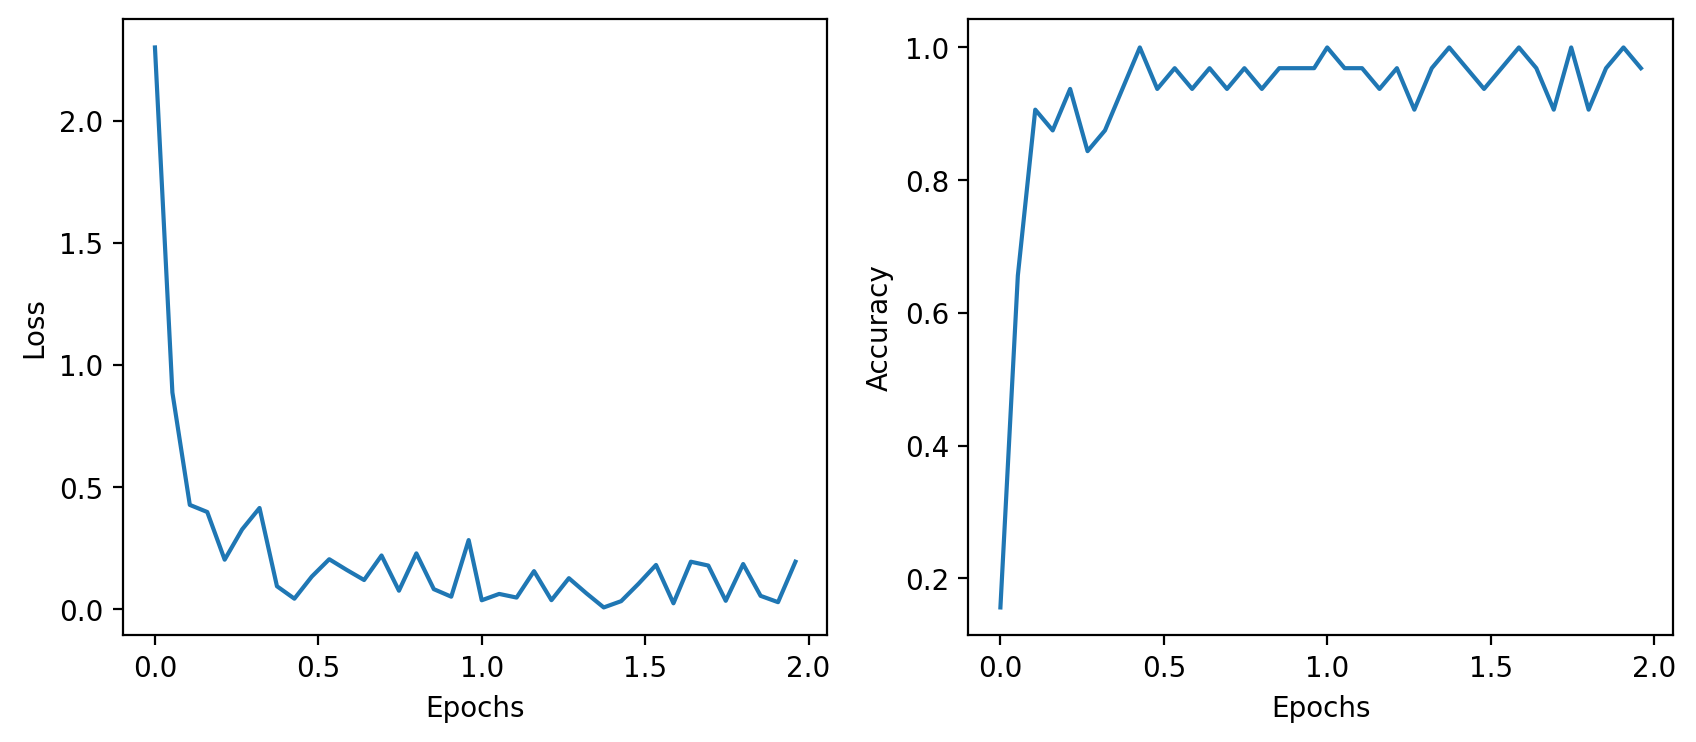

In [40]:
plot_loss_curves(epochs4, losses4, accs4)

In [42]:
test(test_dataloader, model_4)

Model Name: TinyVGG
test loss: 4.035 	 test acc: 0.103


(tensor(4.0352), tensor(0.1029))

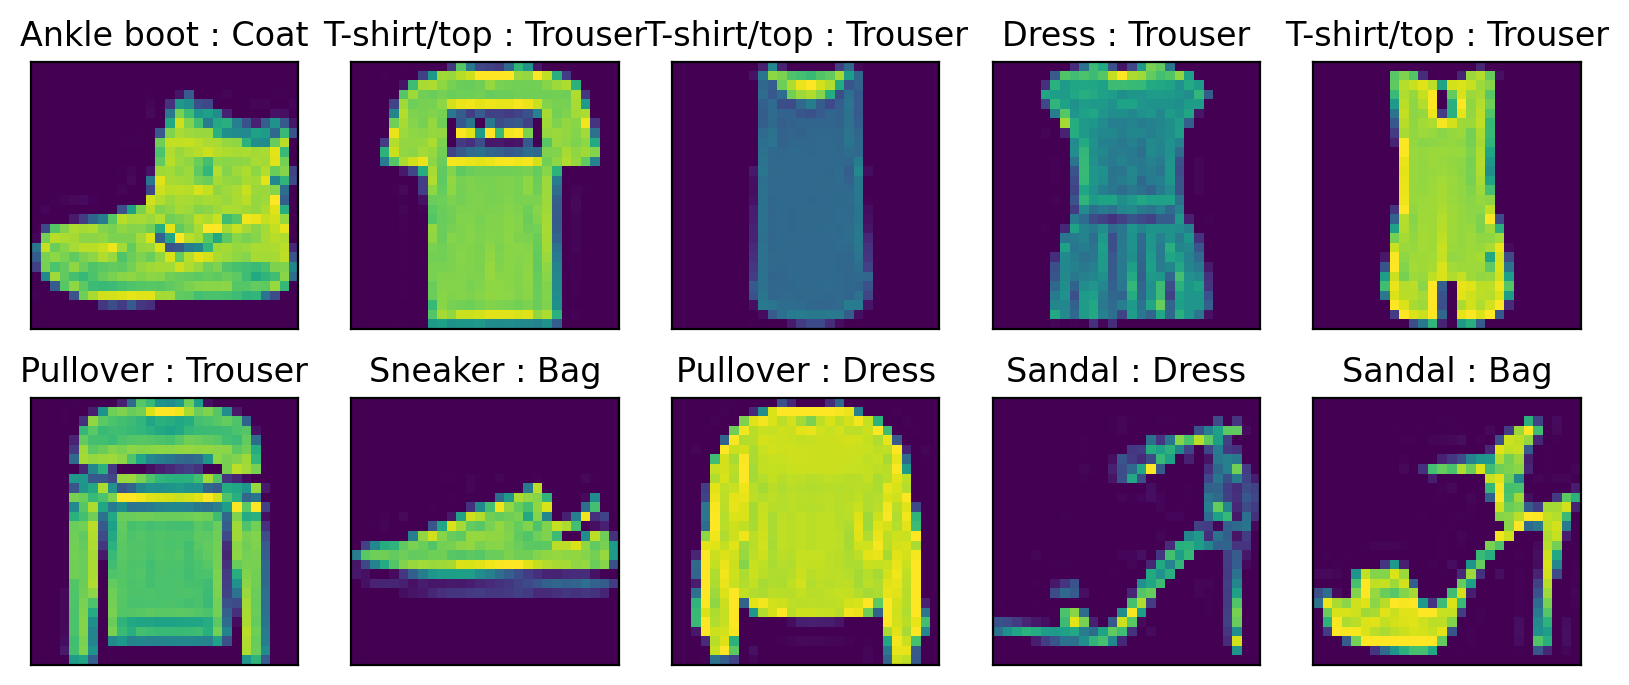

In [43]:
plt.figure(figsize=(10,4))
rows = 2
cols = 5

for i in range(rows*cols):
  plt.subplot(rows, cols,i+1)
  img, label = train_data[i]

  pred = torch.argmax(model_1.model(img.to(device)))
  plt.imshow(img.squeeze())
  plt.title(f"{class_names[label]} : {class_names[pred]}")

  plt.tick_params(
    axis='both',         # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    left=False,
    right=False,
    labelleft=False,
    labelbottom=False)

In [33]:
conf_4 = make_confusion_matrix(model_4.model)

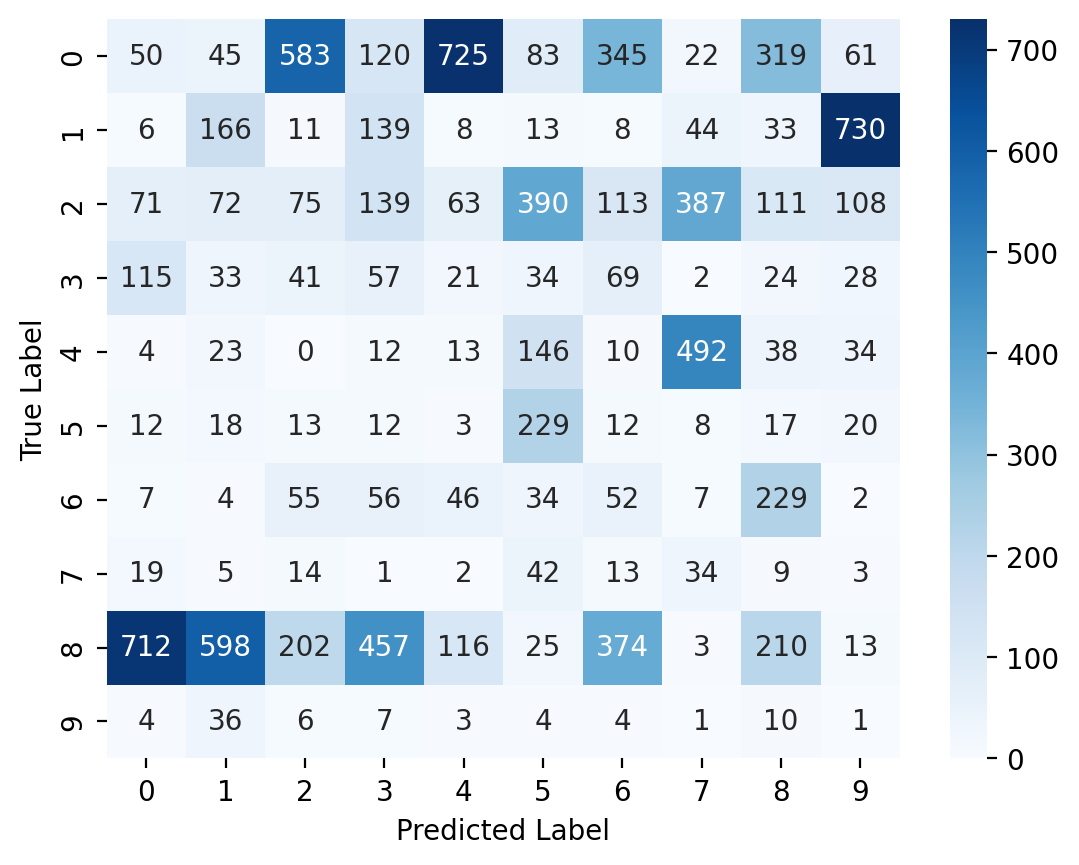

In [36]:
plot_confusion_matrix(conf_4)